In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np

In [22]:
dtypes = {'ip': 'uint', 'app': 'uint',
          'device': 'uint', 'os': 'uint',
          'channel': 'uint', 'is_attributed': 'uint'
          }

path = "../mnt/ssd/kaggle-talkingdata2/competition_files/train.csv"

df = pd.read_csv(path, dtype=dtypes, nrows=1000000)
df['click_time'] = pd.to_datetime(df['click_time'])


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
ip                 1000000 non-null uint32
app                1000000 non-null uint32
device             1000000 non-null uint32
os                 1000000 non-null uint32
channel            1000000 non-null uint32
click_time         1000000 non-null datetime64[ns]
attributed_time    1693 non-null object
is_attributed      1000000 non-null uint32
dtypes: datetime64[ns](1), object(1), uint32(6)
memory usage: 38.1+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C00F54F60>,
      dtype=object)

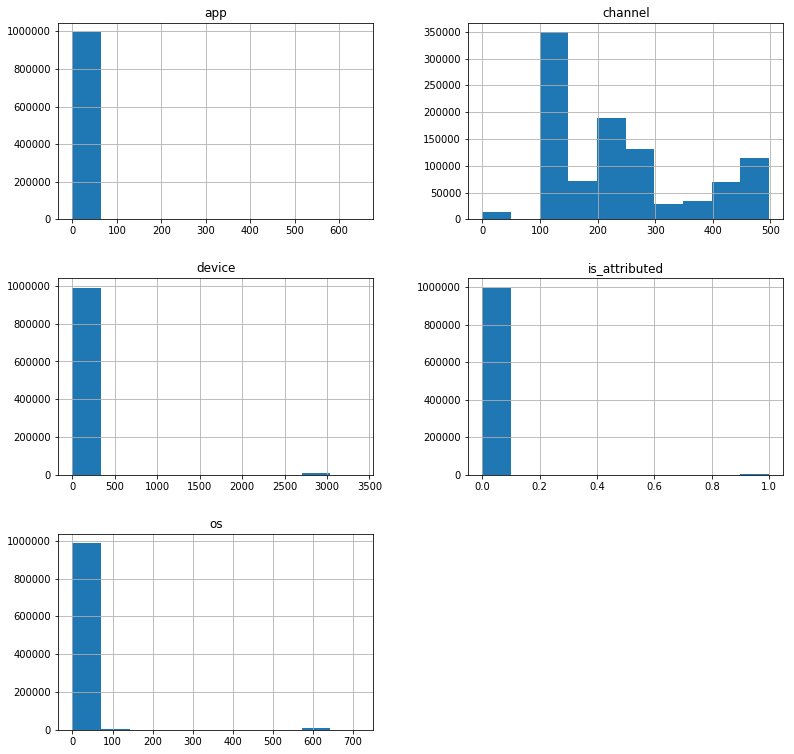

In [24]:
df[['app', 'device', 'os', 'channel', 'is_attributed']].hist(figsize=(13,13))

In [25]:
df = df.sort_values(['ip', 'click_time'], ascending=[True, True])
df['click_time_difference_by_ip'] = df.groupby('ip')['click_time'].diff(1)
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_time_difference_by_ip
136178,9,18,1,13,107,2017-11-06 16:02:30,NaN,0,NaT
145734,9,18,1,13,107,2017-11-06 16:02:41,NaN,0,00:00:11
343557,10,64,1,22,459,2017-11-06 16:06:34,NaN,0,NaT
820623,20,15,1,13,245,2017-11-06 16:17:35,NaN,0,NaT
984013,20,15,1,13,245,2017-11-06 16:21:29,NaN,0,00:03:54


In [26]:
df = df.sort_values(['app', 'click_time'], ascending=[True, True])
df['click_time_difference_by_app'] = df.groupby('device')['click_time'].diff(1)
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_time_difference_by_ip,click_time_difference_by_app
94595,179110,0,0,29,101,2017-11-06 16:01:42,NaN,0,NaT,NaT
94695,198677,0,0,29,101,2017-11-06 16:01:42,NaN,0,NaT,00:00:00
150334,198677,0,0,29,101,2017-11-06 16:02:46,NaN,0,00:01:04,00:01:04
332220,100485,0,343,0,101,2017-11-06 16:06:21,2017-11-06 16:14:29,1,00:00:56,NaT
340155,181812,0,236,21,101,2017-11-06 16:06:30,2017-11-06 16:08:36,1,NaT,NaT


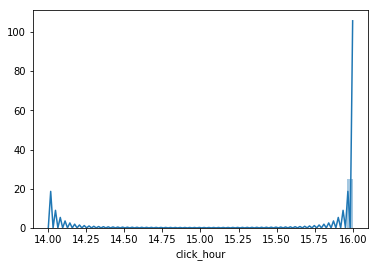

In [27]:
# Hourly click distribution
df.loc[:, 'click_hour'] = df['click_time'].apply(lambda x: x.hour)
sns.distplot(df['click_hour'])

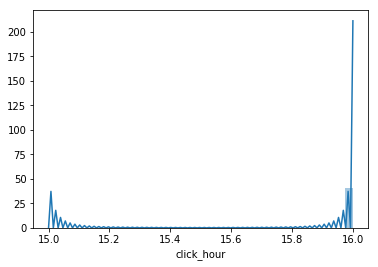

In [28]:
# Hour dist of is_attributed=1
sns.distplot(df['click_hour'].loc[df['is_attributed'] == 1])

In [29]:
df = df.fillna(0)
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_time_difference_by_ip,click_time_difference_by_app,click_hour
94595,179110,0,0,29,101,2017-11-06 16:01:42,0,0,00:00:00,00:00:00,16
94695,198677,0,0,29,101,2017-11-06 16:01:42,0,0,00:00:00,00:00:00,16
150334,198677,0,0,29,101,2017-11-06 16:02:46,0,0,00:01:04,00:01:04,16
332220,100485,0,343,0,101,2017-11-06 16:06:21,2017-11-06 16:14:29,1,00:00:56,00:00:00,16
340155,181812,0,236,21,101,2017-11-06 16:06:30,2017-11-06 16:08:36,1,00:00:00,00:00:00,16


In [30]:
feature_cols = ['ip', 'app', 'device', 'os', 'channel', 'click_time_difference_by_ip', 'click_time_difference_by_app', 'click_hour']
label_col = 'is_attributed'
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols].values, df[label_col].values, shuffle=False, test_size=0.7, random_state=321)

In [31]:
# Fit classifier with out-of-bag estimates
params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'Timedelta'

In [ ]:
y_pred = clf.predict(X_test)
print("ROC:", roc_auc_score(y_test, y_pred))